In [12]:
using Plots

In [191]:
dt = 0.5
g = 9.82
# G = 6.674*10^(-11)
G = 1

1

In [14]:
mutable struct Body
    mass::Number
    x::Number
    y::Number
    vx::Number
    vy::Number
end

In [200]:
function iterateEuler(Fx::Number, Fy::Number, planet::Body, h=dt)
    planet.vx += h * Fx / planet.mass
    planet.vy += h * Fy / planet.mass

    planet.x += h * planet.vx
    planet.y += h * planet.vy
end

iterateEuler (generic function with 2 methods)

In [196]:
function distance(planet1::Body, planet2::Body)
    Δx = planet1.x - planet2.x
    Δy = planet1.y - planet2.y 
    r = (Δx^2 + Δy^2)^0.5
    return abs(r)
end

distance (generic function with 1 method)

In [198]:
function calculateForce(planet1::Body, planet2::Body)
    r = distance(planet1, planet2)
    F = G*planet1.mass*planet2.mass/((r)^2)
    planet1.y > planet2.y ? Fy = -F * sin((planet1.y - planet2.y)/r) : Fy = -F * sin((planet1.y - planet2.y)/r)
    planet1.x > planet2.x ? Fx = -F * cos((planet1.x - planet2.x)/r) : Fx = F * cos((planet2.x - planet2.x)/r)

    return Fx, Fy
end    

calculateForce (generic function with 1 method)

In [194]:
Earth = Body(1.0, 100.0, 0.0, 0, 1.0)
Sun = Body(100.0, 0.0, 0.0, 0, 0)

x, y = [Earth.x, Sun.x], [Earth.y, Sun.y]

X, Y = [Sun.x, Earth.x], [Sun.y, Earth.y]

anim = @animate for i in 1:300
    Fx, Fy = calculateForce(Earth, Sun)
    x, y = [Earth.x, Sun.x], [Earth.y, Sun.y]
    push!(X, Earth.x)
    push!(Y, Earth.y)
    iterateEuler(Fx, Fy, Earth)
    plot(X, Y, 
         xlims=(-150,150), ylims=(-150,150), 
         aspect_ratio=:equal,
         marker=(:circle, 6),
         title="Single Pendulum Simulation",
         xlabel="X position", ylabel="Y position")
end

Animation("/var/folders/z0/_9x091jj0vs_797b_p_b7vcc0000gq/T/jl_8YQM3r", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000291.png", "000292.png", "000293.png", "000294.png", "000295.png", "000296.png", "000297.png", "000298.png", "000299.png", "000300.png"])

[ Info: Saved animation to /Users/05jaco01/Code/Physics/Pendulums/tmp.gif


Plots.AnimatedGif("/Users/05jaco01/Code/Physics/Pendulums/tmp.gif")
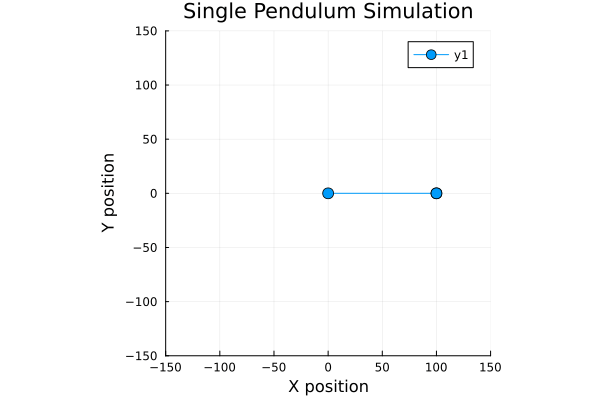

In [195]:
gif(anim, fps = 10) 